# Final project: Predict whether income exceeds $50K/yr.

**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

**Attribute Information:**

Listing of attributes:

* earn: >50K, <=50K (**Target atribute**)

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [2]:
#Import main libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

We will use **adult.data** from UCI ML repository: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [4]:
#Load DataSet
df_adult = pd.read_csv("/content/adult.data",sep=',',header=None)

## 1.Exploratory data analysis

In [5]:
#DataFrame visualization
df_adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Dataframe size:
print('Size DF: ',df_adult.shape)

Size DF:  (32561, 15)


**OBS:**
* There are not header for each feature (column). So, it will be necesary to rename each column.

In [8]:
#Set headers for each feature (reference website):
col_names = ["age","workclass","fnlwgt","education","education-num","marital-status",
             "occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","earn"]
df_adult.columns = col_names

In [9]:
#Verify Changes:
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earn
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#Check data Type
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
earn              object
dtype: object

**OBS:**
* There are 6 numeric variables and 9 categorical variable.
* Target variable is "earn".

In [12]:
# Let us explore more about "earn" variable:
df_adult['earn'].value_counts()

 <=50K    24720
 >50K      7841
Name: earn, dtype: int64

**OBS:**
* Consider that target variable is not balanced in DataSet.

In [13]:
#Check for missing Values:
df_adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
earn              0
dtype: int64

## 2.Correlation and Outliers





Let us briefly analyze the correlation between variables and the presence of any outliers.

In [17]:
#Import Ordinal Encoder from scikit-learn
from sklearn.preprocessing import OrdinalEncoder

In [16]:
#Create a copy from original DataSet
df_adult_enc = df_adult.copy(deep=True)

In [18]:
oc = OrdinalEncoder()
df_adult_enc = pd.DataFrame(oc.fit_transform(df_adult_enc), columns =col_names)
df_adult_enc.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earn
0,22.0,7.0,2671.0,9.0,12.0,4.0,1.0,1.0,4.0,1.0,25.0,0.0,39.0,39.0,0.0
1,33.0,6.0,2926.0,9.0,12.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,12.0,39.0,0.0
2,21.0,4.0,14086.0,11.0,8.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,39.0,39.0,0.0
3,36.0,4.0,15336.0,1.0,6.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,39.0,39.0,0.0
4,11.0,4.0,19355.0,9.0,12.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,39.0,5.0,0.0


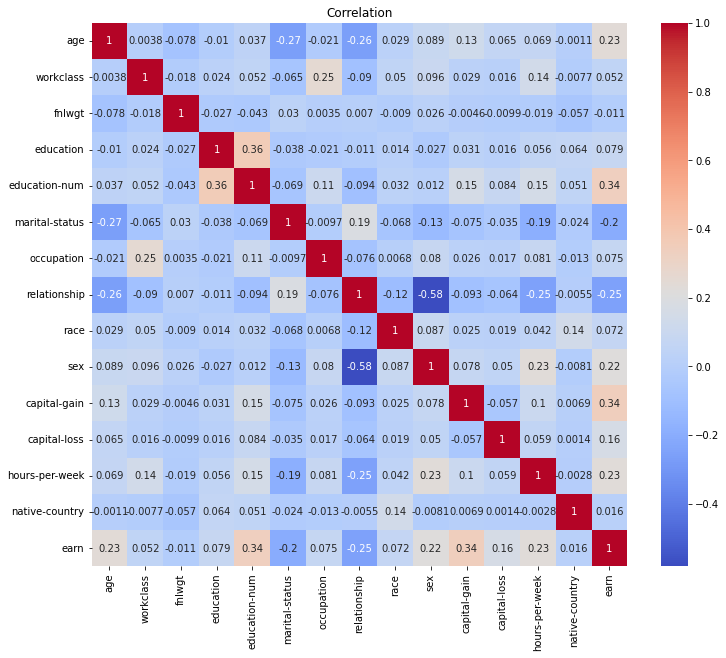

In [20]:
#Heatmap for correlation:
fig = plt.figure(figsize=(12,10))
sns.heatmap(df_adult_enc.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

**OBS:**
* Apparently, some feature like 'fnlwgt', 'race' or 'native-country' have low correlation with target feature 'earn'.

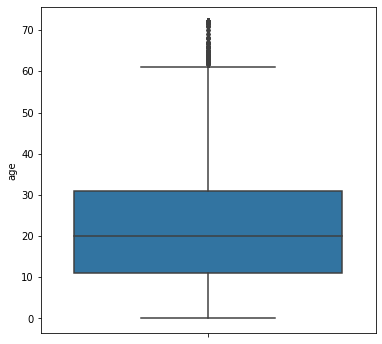

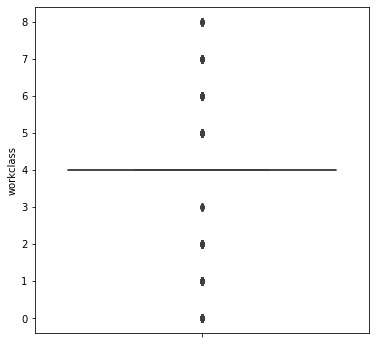

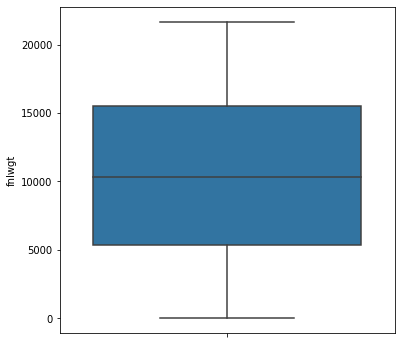

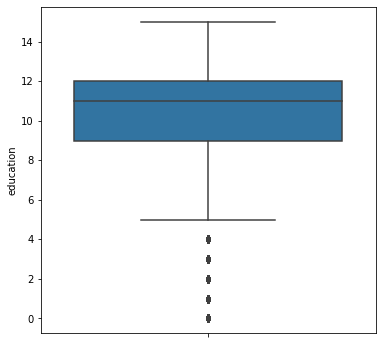

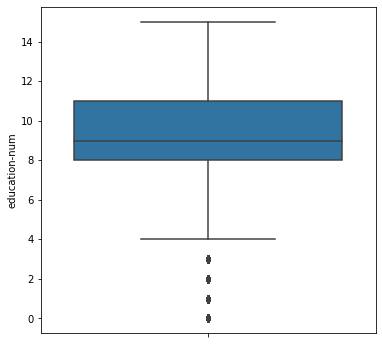

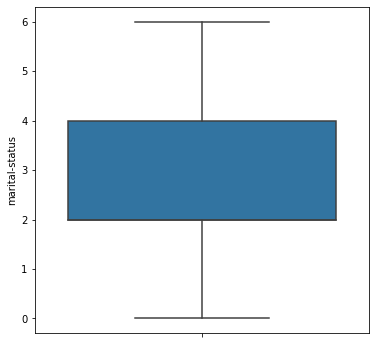

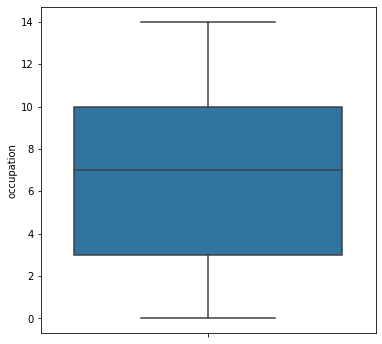

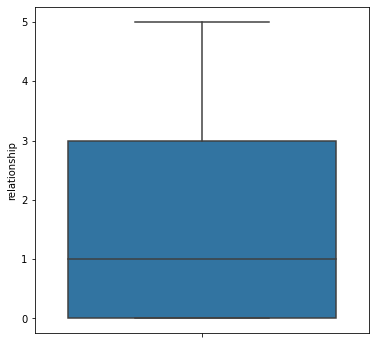

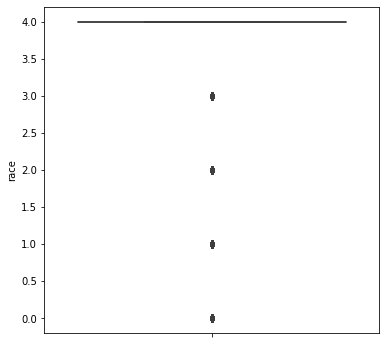

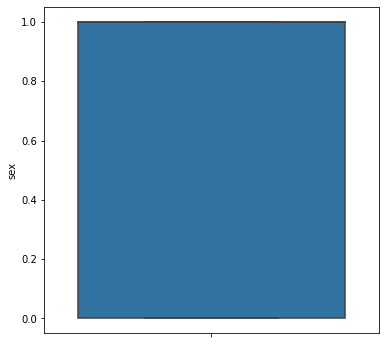

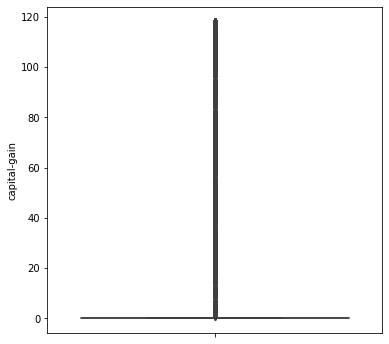

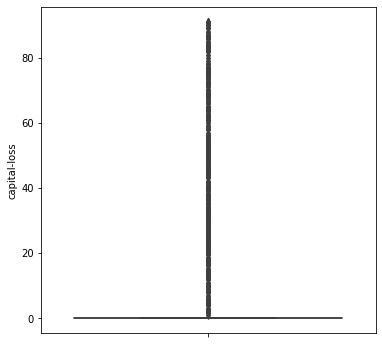

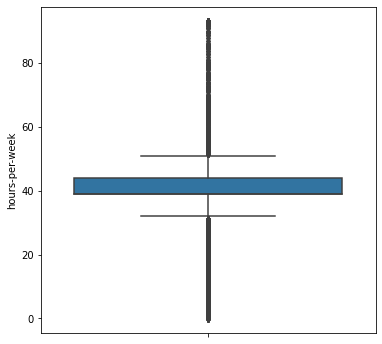

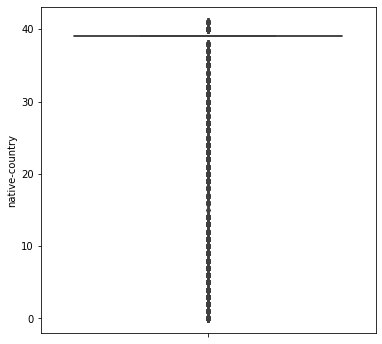

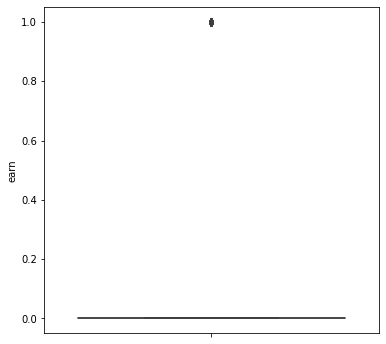

In [31]:
#let us check for outliers:
for i in col_names:
  plt.figure(figsize=(6,6))
  sns.boxplot(data=df_adult_enc, y=i)
  plt.show()

**OBS:**

* There are some outliers for 'age', 'education'and education-num'. We will continue with data processing. 

## 3.Data Processing

In [22]:
#Separete Data Frame into 'x' variable and 'y' variable: 
x = df_adult.drop(['earn'],axis=1)
y = df_adult['earn']

In [23]:
#Libraries to create the model:
from sklearn.model_selection import train_test_split

#30% for 'test' and 70% for 'train':
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=43)

In [24]:
#Check the size of train and test:
x_train.shape, x_test.shape

((22792, 14), (9769, 14))

In [25]:
y_train.shape, y_test.shape

((22792,), (9769,))

In [26]:
#Let us check the content of x_train:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20717,24,Local-gov,32950,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States
11366,37,State-gov,34996,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,40,United-States
28940,46,Private,189498,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1848,45,United-States
28302,50,Private,301583,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
10929,46,Private,224559,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States


In [27]:
x_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
dtype: object

**OBS:**
* we have numeric and categorical variables for 'X' (train and test). In order to continue with the algorithms, we will code the categorical variable.

## 4.Training model : Decision Tree

In [28]:
#if needed: !pip install category-encoders
!pip install category-encoders

In [29]:
#import category_encoders:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['workclass','education','marital-status','occupation','relationship','race','sex','native-country'])
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [30]:
#Check transformation:
x_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
20717,24,1,32950,1,13,1,1,1,1,1,0,0,35,1
11366,37,2,34996,2,9,2,2,2,1,2,0,0,40,1
28940,46,3,189498,1,13,3,1,3,1,1,0,1848,45,1
28302,50,3,301583,2,9,1,3,1,1,1,0,0,40,1
10929,46,3,224559,2,9,3,4,3,2,1,0,0,40,1


In [32]:
#Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Create mode, depth=2 (x_train <5k)
tree = DecisionTreeClassifier(max_depth=2, random_state=43)

In [33]:
#Training:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=43)

In [34]:
#Calculate predictions for Train and Test
y_train_pred_tree = tree.predict(x_train)
y_test_pred_tree = tree.predict(x_test)

### 4.1.Evaluation model: Decision Tree

In [35]:
#Import metrics: 
from sklearn.metrics import accuracy_score

#Accuracy for Train and test:
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('Train Accuracy:', train_accuracy_tree.round(4)*100,'%')
print('Test Accuracy:', test_accuracy_tree.round(4)*100,'%')

Train Accuracy: 80.12 %
Test Accuracy: 80.60000000000001 %


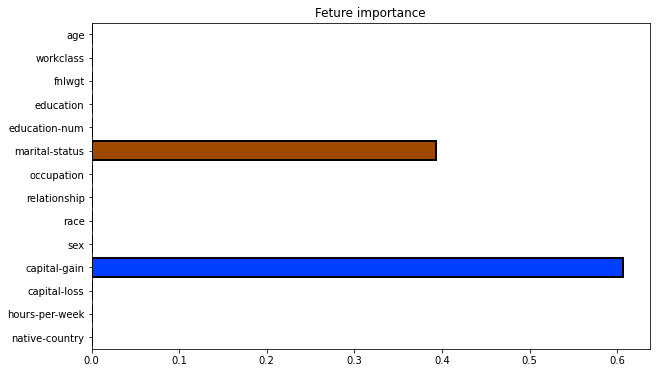

In [38]:
#More important features:
importances = tree.feature_importances_
columns = x.columns
plt.figure(figsize=(10,6))
sns.barplot(y=columns, x=importances, palette='bright', saturation=2.0, edgecolor='black',linewidth=2)
plt.title('Feture importance')
plt.show()

**OBS:**
* Using "Desicion Tree model", apparently features "marital-status" and "capital-gain" have more importace.

* Consider that accuracy for Train and test are too similar.

* Comparing "Feature Importances" and "Correlation" there are some feature like 'education' or 'sex' that should be compared.

## 5.Training model : Random Forest

In [39]:
#Import random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state=43)
rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=43)

In [40]:
#Predictions for Random Forest:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

### 5.1.Evaluation model: Random Forest

In [41]:
#Import metrics (if needed)
from sklearn.metrics import accuracy_score

#Accuracy for Train and Test:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Accuracy_train: ',train_accuracy_rf.round(4)*100)
print('Accuracy_test: ',test_accuracy_rf.round(4)*100)

#Important: we could reduce estimators numbers to avoid overfitting

Accuracy_train:  98.77
Accuracy_test:  85.16


**OBS:**
* "Accuracy_Test" improved using Random Forest, but "Accuracy_train" is almost overfitting. 

In [42]:
# More Important Features:
features_scores = pd.Series(rf.feature_importances_,
                            index =x_train.columns).sort_values(ascending=False)
features_scores

fnlwgt            0.163847
age               0.152644
capital-gain      0.119785
education-num     0.105336
relationship      0.084091
hours-per-week    0.081711
marital-status    0.078482
occupation        0.071368
workclass         0.039424
capital-loss      0.035409
education         0.025792
native-country    0.017718
race              0.013689
sex               0.010705
dtype: float64

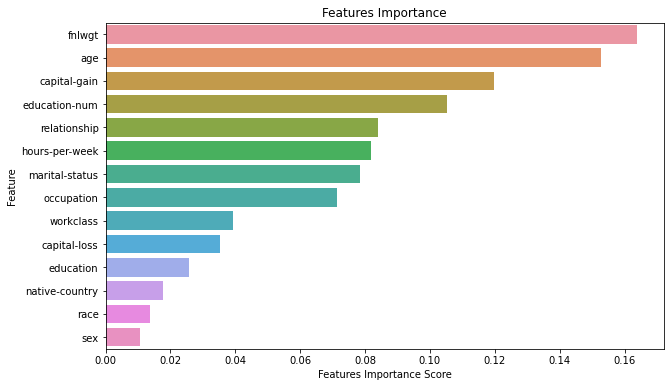

In [44]:
#BarPlot:
plt.figure(figsize=(10,6))
sns.barplot(x=features_scores, y=features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title('Features Importance')
plt.show()

**OBS:**
* Using random forest algorithm, feature like 'fnlwgt' and 'age' become more relevant than 'capital-gain'.

* 'education-num', 'relationship', 'hours-per-week' become more relevant than 'marital-stauts'.

In [45]:
# Confusion Matrix for Ranfom Forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
print('Matriz de confusion: \n\n',cm)

Matriz de confusion: 

 [[6963  471]
 [ 979 1356]]


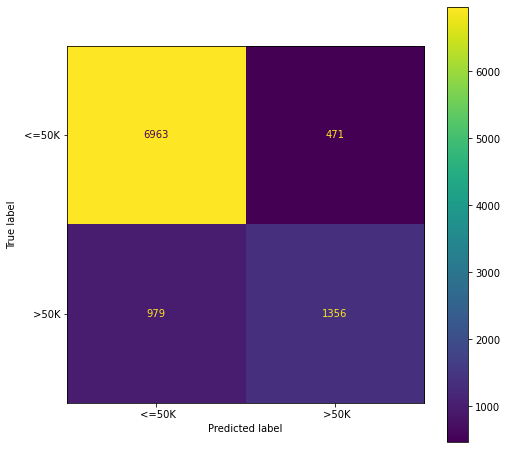

In [47]:
#Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cmp = ConfusionMatrixDisplay(cm, display_labels =rf.classes_)
fig, ax = plt.subplots(figsize=(8,8))
cmp.plot(ax=ax)
plt.show()


In [46]:
#Random Forest Metrics:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7434
        >50K       0.74      0.58      0.65      2335

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



**Final Observations:**

* Using Radom Forest give us more precision than decision tree, but there are some considerations
  * Dataset is unbalanced (look at Confusion Matrix).
  * "Precision", "Recall", "f1-score" and "support" have better results for '<=50k' (because of unbalanced dataset)

* Comparing "Correlation" and "Randon Forest Feature importance" there are many similitude, except for feature "fnlwgt".It would be interesting to understand the relevance of this feature.